# **PREDICTING SPOTIFY SONG POPULARITY:**    **MODELLING THE "WHOOP"**

## INTRODUCTION

**PURPOSE:**
    
    Let us model song elements that are hypothesized to affect song popularity. 
    This project will cover an investigation of the hypothetically popular "Millenial Whoop" [MW]
    
    A) Can we train a model to identify the "Millenial Whoop" in a spotify song? 
    B) Will the occurance of the MW coorelate with a song's popularity metric as determined by Spotify? 
    
    In this project we investigate Question A) by modelling MW pitch patterns. 
    Question B) will later be investigated.

**BACKGROUND:**

    [Insert dude's name] identified a common 3-5 chord progression used commonly in modern pop music. 
    The claim is that this 3-5 chord progression known as the "Millenial Whoop" is a satisfying song element 
    that helps ensure song likability. Song likability reduces the financial risk incured by a record company 
    upon release of a new song. For more on [insert dude's name]'s work, see here [insert link].
    
**APPROACH:**

    For the sake of of this project we will try to a) train a model to identify the "Millenial Whoop" in a song, 
    and b) see if there exists a relationship between the rate of occurance of a song "Whoop" and the popularity 
    of that song, as measured using Spotify's algorithm. 
    
**TOOLS:**

     The majority of data collection and has been done outside the scope of this notebook using web scraping 
     techniques. Data wrangling tools include a functional F# program which uses REST calls to generate tokens 
     and download JSON song information from the Spotify Web API. Various track JSON files were downloaded 
     for exploration including: "Track", "Audio Features" and "Audio Analysis" 

**DATA:**
     
     Original Spotify Audio Analysis JSON files contain much more information that what has been brought 
     into this notebook, and such information is a useful source of embelishment for later versions of 
     this project. 
     
     The format of the collected audio information that you will see here is of the form 39X216 - where 216 
     is a concatenated array of pitch occurances.  

## DATA COLLECTION

Import Python Libraries 

In [27]:
#imports

%matplotlib inline 

#graphical imports
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import mpl_toolkits.mplot3d as m3d

#numerical, os and dataframe imports
import numpy as np
import os
import pandas as pd

#data modelling imports 
#from sklearn import cross_validation 
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.svm import SVC

#stats imports
from scipy import stats
from scipy import stats, special

#file imports
import json
import ijson
from pandas.io.json import json_normalize

Explore format of raw Spotify JSON Audio Analysis file, for key 'Segments'

In [60]:
file = 'C:\\Users\\Jnfr\\Projects\\SpotifyAnalyticsApp\\whoopsegments.json'

with open(file) as train_file:
    dict_train = json.load(train_file)

print(dict_train)
df = pd.DataFrame.from_dict(dict_train)

[{'id@': '6Mk0xtgL6tZ7XQc9GAvobj', 'segmentData@': [{'Confidence': 0.128, 'Duration': 0.11156, 'LoudnessEnd': 0, 'LoudnessMax': -3.879, 'LoudnessMaxTime': 0.01235, 'LoudnessStart': -8.625, 'Pitches': [0.564, 0.946, 0.615, 0.502, 0.659, 0.685, 0.814, 0.84, 0.771, 0.783, 1, 0.495], 'Start': 14.01982, 'Timbre': [53.262, 87.684, 8.567, 7.666, -6.569, -42.981, 7.002, 0.506, -12.208, -2.235, -8.957, 11.63]}, {'Confidence': 0.385, 'Duration': 0.11438, 'LoudnessEnd': 0, 'LoudnessMax': -3.968, 'LoudnessMaxTime': 0.03428, 'LoudnessStart': -9.512, 'Pitches': [0.643, 1, 0.372, 0.288, 0.2, 0.178, 0.156, 0.104, 0.154, 0.121, 0.321, 0.28], 'Start': 14.13138, 'Timbre': [53.819, 83.446, 12.116, -4.742, -2.073, -30.728, 6.87, -3.519, -3.02, -3.121, -0.212, 5.276]}, {'Confidence': 0.083, 'Duration': 0.11025, 'LoudnessEnd': 0, 'LoudnessMax': -4.229, 'LoudnessMaxTime': 0.01993, 'LoudnessStart': -7.929, 'Pitches': [0.482, 1, 0.399, 0.857, 0.733, 0.381, 0.528, 0.438, 0.463, 0.422, 0.369, 0.518], 'Start': 14.

In [3]:
df
#del df['id@']

,id@,segmentData@
0,6Mk0xtgL6tZ7XQc9GAvobj,"[{'Confidence': 0.128, 'Duration': 0.11156, 'L..."
1,4i1MWIchrtBoSh6wcAdt7e,"[{'Confidence': 0.673, 'Duration': 0.34685, 'L..."
2,40ydUI6moZMoOd65wbf6oz,"[{'Confidence': 0.5, 'Duration': 0.2332, 'Loud..."
3,3PYqi5gL3oQMaTPbKZuX7K,"[{'Confidence': 0.311, 'Duration': 0.25324, 'L..."
4,3CrIwWljwzUizLxGpyhclW,"[{'Confidence': 0.545, 'Duration': 0.30912, 'L..."
5,2ZWlPOoWh0626oTaHrnl2a,"[{'Confidence': 0.531, 'Duration': 0.29306, 'L..."
6,71L6AaNp9N96PH0ZApnkbR,"[{'Confidence': 0.933, 'Duration': 0.18694, 'L..."
7,5nqof30JRAkvfxcj9cgS0n,"[{'Confidence': 1, 'Duration': 0.13637, 'Loudn..."
8,1iqZjQH18k8SfhsOuhnJTZ,"[{'Confidence': 0.753, 'Duration': 0.38889, 'L..."
9,0IVHlst3XMgzXUJbIyZ8oO,"[{'Confidence': 0.879, 'Duration': 0.20807, 'L..."


## WRANGLE DATA

In [4]:
#stores 216 song pitches for each segment, concatenated in list of 18 segments/song
###list = []

df_pitches = pd.DataFrame(columns=[x for x in range(216)])

#for index 0...38, row id@, segmentData@
for index, row in df.iterrows():
    
    for n in range(18):
        if n == 0:
            templist = []
            templist = row['segmentData@'][n]['Pitches']
        elif n <=18:
            templist += row['segmentData@'][n]['Pitches']
    
    ###list+=templist
    
    df_pitches.loc[index] = templist
# list is 12 * 18 * 39 (12 pitches/segment * 18 segments/song * 39 songs)
df_pitches

###print(len(list))
###print(list)

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,0.564,0.946,0.615,0.502,0.659,0.685,0.814,0.840,0.771,0.783,...,1.000,0.800,0.286,0.141,0.248,0.139,0.183,0.639,0.235,0.364
1,0.183,1.000,0.983,0.377,0.173,0.139,0.276,0.107,0.089,0.084,...,1.000,0.452,0.227,0.230,0.480,0.241,0.152,0.132,0.256,0.273
2,0.489,0.329,0.142,0.774,0.173,0.106,0.228,0.709,0.181,0.165,...,0.156,0.193,0.386,0.328,0.675,0.674,0.980,0.991,1.000,0.048
3,0.710,1.000,0.387,0.215,0.464,0.350,0.121,0.282,0.142,0.051,...,0.494,0.292,0.518,0.215,0.407,1.000,0.287,0.093,0.078,0.521
4,0.072,0.074,1.000,0.110,0.038,0.218,0.029,0.027,0.028,0.044,...,0.150,0.109,0.264,1.000,0.237,0.082,0.083,0.108,0.185,0.557
5,0.231,0.275,0.639,0.127,0.065,0.079,0.360,1.000,0.103,0.227,...,0.182,0.061,0.225,0.071,0.182,1.000,0.119,0.023,0.052,0.229
6,0.397,0.642,1.000,0.749,0.580,0.871,0.358,0.214,0.147,0.209,...,0.034,0.057,0.265,1.000,0.304,0.060,0.038,0.114,0.053,0.086
7,0.753,0.771,0.675,0.588,0.971,0.909,0.886,1.000,0.428,0.424,...,0.319,0.276,0.687,0.599,0.857,1.000,0.504,0.498,0.076,0.034
8,0.117,0.160,0.084,0.087,0.191,0.096,0.142,0.125,0.224,1.000,...,0.129,0.228,1.000,0.259,0.240,0.069,0.048,0.065,0.057,0.152
9,0.120,0.021,0.118,0.018,0.041,0.079,0.101,0.021,0.040,0.247,...,1.000,0.099,0.051,0.088,0.124,0.340,0.072,0.126,0.026,0.195


## DATA EXPLORATION

Visualizing whoop pitch patterns between two songs:

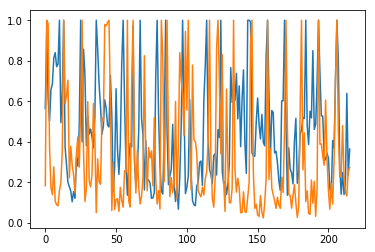

In [55]:
df_pitches.loc[0].plot()
df_pitches.loc[1].plot()

Vizualizing overlay of pitch range across 39 "whoop" songs:

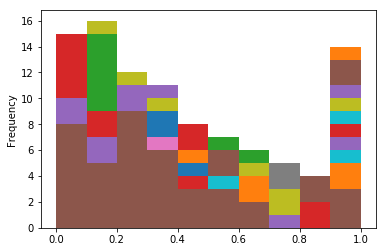

In [59]:
df_pitches.plot(kind='hist', legend=None)

## HYPOTHESIS

## MODEL DATA: SVC

In [32]:
#df_pitches.as_matrix()

feature_cols = [x for x in range(216)]

#grab all rows, and all cols
X = df_pitches.loc[:, feature_cols]

#X = pd.get_dummies(df_pitches)

# y response value in training set is always true, for 39 songs
y = np.array([(0 or 1) for x in range(39)])

print(X.shape) # (5,4)
print(y.shape) # (5,)
print(y)
print(np.unique(y))

clf = SVC(kernel='linear', C=1.0)
#xtrain = clf.fit(X,y)
test_size = 20
clf.fit(X[:test_size],y[:test_size])

#xpredict = 

(39, 216)
(39,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1]


ValueError: The number of classes has to be greater than one; got 1

## RESULTS AND MODEL ACCURACY

## DISCUSSION AND LIMITATIONS

## SUMMARY

**______x__________x__________x__________x__________x_____ ARCHIVE TO FOLLOW _____x__________x__________x__________x__________x_____**

## UNUSED CODE

In [35]:
#plt.plot(df);
#data_dict = dict(zip((str(df['start'])), (df['pitches'])))
#data_dict = dict((str(pitch),pitch) for pitch in df['pitches'])
#py.plot(data_dict, filename='basic-scatter')
#scatter(df['pitches'], df['start']);

#df.plot(x='start', y='pitches')

#plt.scatter(df['start'], df['pitches'])
#plt.show()
#df.columns
#dataframe = pd.DataFrame(df['pitches'])
#dataframe

#df.T.plot( kind='bar') # or df.T.plot.bar()
#plt.show()

In [41]:
file = 'C:\\Users\\Jnfr\\Projects\\SpotifyAnalyticsApp\\amy_winehouse_addicted.json'

with open(file, 'r') as json_data2:
    track = ijson.items(json_data2, 'track')
    trackCols = list(track)
    
df2 = pd.DataFrame.from_dict(json_normalize(trackCols))

In [43]:
df2

""


In [45]:
with open(file, 'r') as json_data3:
    sections = ijson.items(json_data3, 'sections')
    secCols = list(sections)
    
df3 = pd.DataFrame.from_dict(json_normalize(secCols))

In [46]:
df3

""


In [47]:
with open(file, 'r') as json_data3:
    beats = ijson.items(json_data3, 'beats')
    beatCols = list(beats)
    
df4 = pd.DataFrame.from_dict(json_normalize(beatCols))

In [48]:
df4

""


### CREATE FREQUENCY DATAFRAME

In [ ]:
data = {'octave_num': ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1','1','1','1','1','1','1','1','1','1',
                       '2', '2','2','2','2','2','2','2','2','2','2','2','3','3','3','3','3','3','3','3','3','3','3','3','4','4','4','4','4','4','4','4','4','4','4','4',
                       '5','5','5','5','5','5','5','5','5','5','5','5','6','6','6','6','6','6','6','6','6','6','6','6','7','7','7','7','7','7','7','7','7','7','7','7',
                       '8','8','8','8','8','8','8','8','8','8','8','8'], 'note': [ 'C', 'C#','D', 'Eb', 'E','F', 'F#', 'G', 'G#', 'A', 'Bb', 'B', 'C', 'C#','D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B',
                       'C', 'C#','D','Eb','E','F','F#', 'G', 'G#', 'A', 'Bb', 'B','C', 'C#','D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B',
                       'C', 'C#','D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B','C', 'C#','D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B',
                       'C', 'C#','D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B', 'C', 'C#','D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B',
                       'C', 'C#','D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'],'frequency': [16.35,17.32,18.35,19.45,20.60,21.83,23.12,24.50,25.96,27.50,29.14,30.87,32.70,34.65,36.71,38.89,41.20,43.65,46.25,49.00,51.91,55.00,58.27,61.74,65.41,69.30,73.42,77.78,82.41,87.31,92.50,98.00,103.8,110.0,116.5,123.5,130.8,138.6,146.8,155.6,164.8,174.6,185.0,196.0,207.7,220.0,233.1,246.9,261.6,277.2,293.7,311.1,329.6,349.2,370.0,392.0,415.3,440.0,466.2,493.9,523.3,554.4,587.3,622.3,659.3,698.5,740.0,784.0,830.6,880.0,932.3,987.8,1047,1109,1175,1245,1319,1397,1480,1568,1661,1760,1865,1976,2093,2217,2349,2489,2637,2794,2960,3136,3322,3520,3729,3951,4186,4435,4699,4978,5274,5588,5920,6272,6645,7040,7459,7902]}


df_frequency = pd.DataFrame(data)
df_frequency.head()

In [ ]:
#load whoop data
import csv
from io import StringIO
import re
import pandas as pd

file_whoop = "c:\\Users\\Jnfr\\Projects\\SpotifyAnalyticsApp\\whoops.csv"

# get the data as a python string
with open (file_whoop, "r") as myfile:
    data=myfile.read()

# munge in python - get rid of the garbage in the input (lots of xff bytes)
data = re.sub(r'[^,a-zA-Z0-9_\.;:\n]', '', data) # get rid of the rubbish
#data = data + '\n' # the very last one is missing?
#data = re.sub(r';\n', r'\n', data) # last ; separator on line is problematic

# now let's suck into a pandas DataFrame
columns = ['artist', 'song_name', 'year', 'whoop_time', 'youtube_url']
df = pd.read_csv(StringIO(data), index_col=None, header=0, sep=',')
df.columns = columns
'''with open(file_whoop, 'r') as f:
    readCSV = csv.reader(f, delimiter=',')
    print(readCSV)
    #df = pd.DataFrame(object) '''


#df = pd.read_csv(file_whoop, header=0,encoding='iso-8859-1', error_bad_lines=False)
#df = pd.read_csv(StringIO(file_whoop), encoding = "cp1252")
df
#list = open(file_whoop, 'r')
#df_whoops = pd.DataFrame([list.read()])
#print(df_whoops)


### CREATE WHOOP DATAFRAME

# CONCLUSION

# DISCUSSION & LIMITATIONS
